In [37]:
import numpy as np  
import matplotlib.pyplot as plt

## Constants and given values

In [38]:
ndark=0.002      #number of electrons/sec/pixel
NRON=1.5         #Read out noise e/pixel 

Cr=-16.26
skyBr_r=5.47*10**(-16)

Ci=-16.06
skyBr_i=2.15*10**(-16)

Cg=-16.26
skyBr_g=8.11*10**(-16)

In [39]:
angle_to_pixel=0.55

In [40]:
r=2                 #PSF radius in arcsec 
A=np.pi*r**2
Npix=A/angle_to_pixel**2          #Number of pixel from the PSF and dimension in arcsec of the pixel length 
Npix

41.54172103920387

In [41]:
c=3*10**(18)
li=8000
lr=6500
lg=4500

Final Formula

In [42]:
def SNR(time, C, mnu, skyBr,l):
    nsky=skyBr/10**C*0.55**2            #0.55**2 because is the number of electrons per pixel
    nstar=10**(-((mnu+48.6)/2.5+C))*c/l**2
    return nstar*time/np.sqrt(nstar*time+Npix*(nsky*time+ndark*time+NRON**2))

In [43]:
mnu=17

Text(0, 0.5, 'SNR')

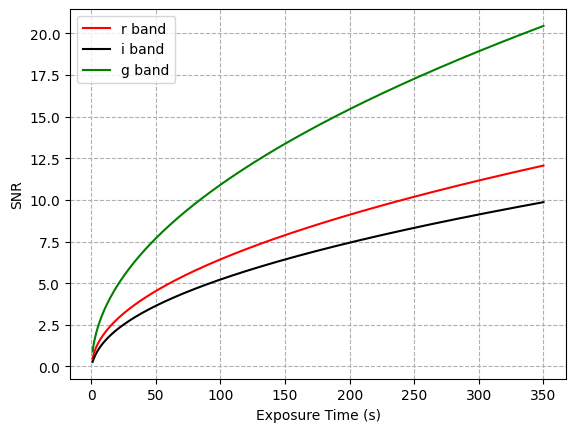

In [44]:
t_values = np.linspace(1, 350, 500)
snr_values_r = SNR(t_values, Cr,mnu, skyBr_r,lr)
snr_values_i = SNR(t_values, Ci,mnu, skyBr_i,li)
snr_values_g = SNR(t_values, Cg,mnu, skyBr_g,lg)
plt.plot(t_values, snr_values_r, label='r band', color='red')
plt.plot(t_values, snr_values_i, label='i band', color='black')
plt.plot(t_values, snr_values_g, label='g band', color='green')
# plt.plot(t_values, SNR(t_values, Cr, 17, skyBr_r,lr), color='red', linestyle='--')
# plt.plot(t_values, SNR(t_values, Ci, 17, skyBr_i,li), color='black', linestyle='--')
# plt.plot(t_values, SNR(t_values, Cg, 17, skyBr_g,lg), color='green', linestyle='--')
plt.xlabel('Exposure Time (s)')
plt.grid(visible=None, which='major', axis='both',linestyle='--')
plt.legend()
plt.ylabel('SNR')

Text(0, 0.5, 'SNR')

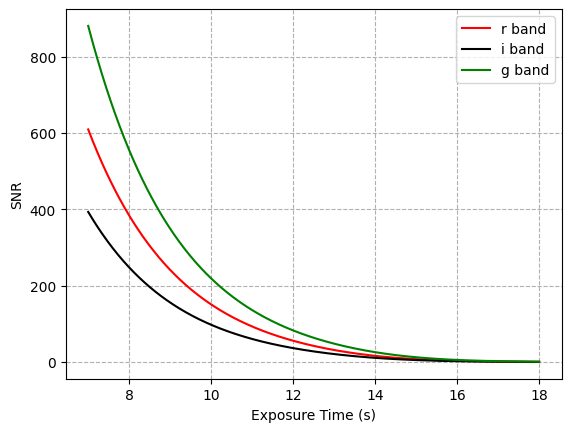

In [50]:
m_values = np.linspace(7, 18, 500)
snr_values_r = SNR(5, Cr,m_values, skyBr_r,lr)
snr_values_i = SNR(5, Ci,m_values, skyBr_i,li)
snr_values_g = SNR(5, Cg,m_values, skyBr_g,lg)
plt.plot(m_values, snr_values_r, label='r band', color='red')
plt.plot(m_values, snr_values_i, label='i band', color='black')
plt.plot(m_values, snr_values_g, label='g band', color='green')
# plt.plot(t_values, SNR(t_values, Cr, 17, skyBr_r,lr), color='red', linestyle='--')
# plt.plot(t_values, SNR(t_values, Ci, 17, skyBr_i,li), color='black', linestyle='--')
# plt.plot(t_values, SNR(t_values, Cg, 17, skyBr_g,lg), color='green', linestyle='--')
plt.xlabel('Exposure Time (s)')
plt.grid(visible=None, which='major', axis='both',linestyle='--')
plt.legend()
plt.ylabel('SNR')

In [45]:
import numpy as np

def exposure_time(
    snr,
    nu,
    n_dark,
    skyBr,
    n_pix,
    ron,
    l,
    Ci
):
    nsky=skyBr/10**Ci*0.55**2
    nstar=10**(-((nu+48.6)/2.5+Ci))*c/l**2
    A = nstar**2
    B = -snr**2 * (nstar + n_pix * (n_dark + nsky))
    C = -snr**2 * n_pix * ron**2

    discriminant = B**2 - 4 * A * C



    t = (-B + np.sqrt(discriminant)) / (2 * A)

    return t

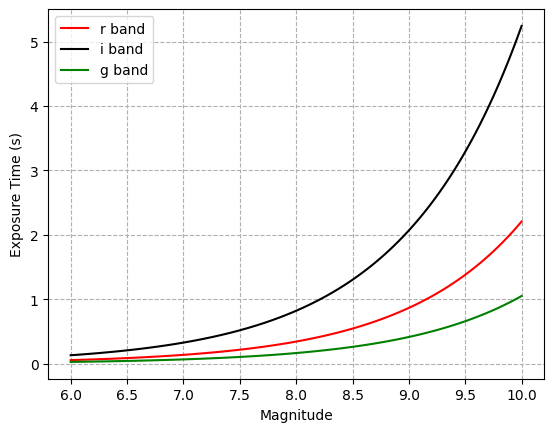

In [48]:
magns=np.linspace(6,10,100)
exptime=exposure_time(100,magns,ndark,skyBr_r,Npix,NRON,lr,Cr)
plt.plot(magns,exptime, label='r band', color='red')
exptime=exposure_time(100,magns,ndark,skyBr_i,Npix,NRON,li,Ci)
plt.plot(magns,exptime, label='i band', color='black')
exptime=exposure_time(100,magns,ndark,skyBr_g,Npix,NRON,lg,Cg)
plt.plot(magns,exptime, label='g band', color='green')
plt.xlabel('Magnitude')
plt.grid(visible=None, which='major', axis='both',linestyle='--')
plt.ylabel('Exposure Time (s)')
plt.legend()
#plt.yscale('log')